In [85]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from datetime import timedelta
from datetime import datetime
from scipy.stats import ttest_ind

#### Importing dataset

In [2]:
purchase_data = pd.read_csv ("QVI_purchase_behaviour.csv")
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")

In [3]:
purchase_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [4]:
transaction_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [5]:
transaction_data['PROD_NAME'].isnull().sum()

0

In [6]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [8]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [9]:
# Correcting transaction_data['DATE'] from int to date datatype
transaction_data['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transaction_data['DATE'], unit='D')

In [10]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [11]:
transaction_data['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [12]:
transaction_data['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [13]:
transaction_prodname = transaction_data['PROD_NAME'].str.replace('[+/&%#@\+]', '', regex=True)

In [14]:
transaction_prodname.head(10)

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3        Smiths Chip Thinly  SCreamOnion 175g
4     Kettle Tortilla ChpsHnyJlpno Chili 150g
5    Old El Paso Salsa   Dip Tomato Mild 300g
6     Smiths Crinkle Chips Salt  Vinegar 330g
7       Grain Waves         Sweet Chilli 210g
8     Doritos Corn Chip Mexican Jalapeno 150g
9        Grain Waves Sour    CreamChives 210G
Name: PROD_NAME, dtype: object

In [15]:
transaction_prodname.describe()

count                                    264836
unique                                      114
top       Kettle Mozzarella   Basil  Pesto 175g
freq                                       3304
Name: PROD_NAME, dtype: object

In [16]:
prodname_sorted = transaction_prodname.loc[transaction_prodname.map(transaction_prodname.value_counts())
                                           .sort_values(ascending=False).index]

In [17]:
prodname_sorted.describe()

count                                    264836
unique                                      114
top       Kettle Mozzarella   Basil  Pesto 175g
freq                                       3304
Name: PROD_NAME, dtype: object

In [18]:
prodname_sorted

261817    Kettle Mozzarella   Basil  Pesto 175g
203359    Kettle Mozzarella   Basil  Pesto 175g
6050      Kettle Mozzarella   Basil  Pesto 175g
99471     Kettle Mozzarella   Basil  Pesto 175g
148915    Kettle Mozzarella   Basil  Pesto 175g
                          ...                  
224179        WW Crinkle Cut      Original 175g
178670        WW Crinkle Cut      Original 175g
224159        WW Crinkle Cut      Original 175g
21244         WW Crinkle Cut      Original 175g
41257         WW Crinkle Cut      Original 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [19]:
mask = prodname_sorted.str.contains('Salsa')
prodname_filtered = prodname_sorted[~mask]

In [20]:
prodname_filtered

261817    Kettle Mozzarella   Basil  Pesto 175g
203359    Kettle Mozzarella   Basil  Pesto 175g
6050      Kettle Mozzarella   Basil  Pesto 175g
99471     Kettle Mozzarella   Basil  Pesto 175g
148915    Kettle Mozzarella   Basil  Pesto 175g
                          ...                  
224179        WW Crinkle Cut      Original 175g
178670        WW Crinkle Cut      Original 175g
224159        WW Crinkle Cut      Original 175g
21244         WW Crinkle Cut      Original 175g
41257         WW Crinkle Cut      Original 175g
Name: PROD_NAME, Length: 246742, dtype: object

In [21]:
prodname_filtered.describe()

count                                    246742
unique                                      105
top       Kettle Mozzarella   Basil  Pesto 175g
freq                                       3304
Name: PROD_NAME, dtype: object

In [22]:
transaction_data['PROD_NAME']= prodname_filtered

In [23]:
transaction_data['PROD_NAME'].describe()

count                                    246742
unique                                      105
top       Kettle Mozzarella   Basil  Pesto 175g
freq                                       3304
Name: PROD_NAME, dtype: object

# Outlier

In [24]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [25]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [26]:
outlier_customer = transaction_data[(transaction_data['PROD_QTY'] >=150)]
outlier_customer

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [27]:
# Removing outlier by loyalty number (LYLTY_CARD_NNBR)
outlier_removed = transaction_data[(transaction_data['LYLTY_CARD_NBR'] != 226000)]
outlier_removed.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [28]:
outlier_removed

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


# Transaction By Date

In [29]:
transaction_counts = outlier_removed.groupby('DATE')['STORE_NBR'].count().reset_index()
transaction_counts.columns = ['DATE', "TXN_COUNT"]
transaction_counts

,DATE,TXN_COUNT
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
...,...,...
359,2019-06-26,723
360,2019-06-27,709
361,2019-06-28,730
362,2019-06-29,745


In [30]:
start_date = datetime.strptime("2018-7-1", "%Y-%m-%d")
end_date = datetime.strptime("2019-6-30", "%Y-%m-%d")
D = 'D'




date_sequence = pd.date_range(start_date, end_date, freq='D')
date_sequence

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [31]:
transaction_date_summary = pd.concat([transaction_counts, pd.Series(date_sequence)], axis=1)

transaction_date_summary.columns = ['DATE', "TXN_COUNT", 'General_Date']
transaction_date_summary

,DATE,TXN_COUNT,General_Date
0,2018-07-01,724.0,2018-07-01
1,2018-07-02,711.0,2018-07-02
2,2018-07-03,722.0,2018-07-03
3,2018-07-04,714.0,2018-07-04
4,2018-07-05,712.0,2018-07-05
...,...,...,...
360,2019-06-27,709.0,2019-06-26
361,2019-06-28,730.0,2019-06-27
362,2019-06-29,745.0,2019-06-28
363,2019-06-30,744.0,2019-06-29


# Plotting Date against transaction count

Text(0.5, 1.0, 'Transaction Count By Month')

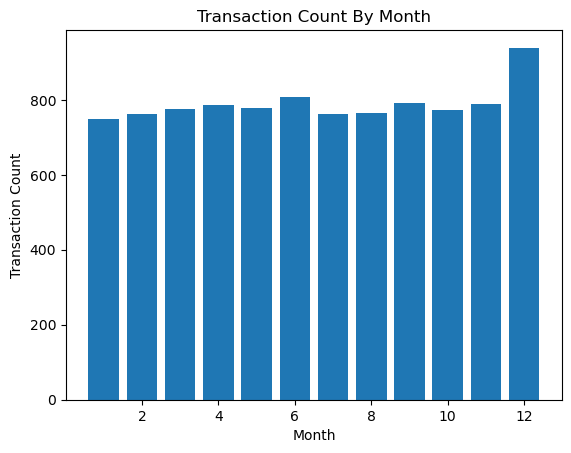

In [32]:
plt.bar(transaction_date_summary['DATE'].dt.month, transaction_date_summary['TXN_COUNT'])

plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Transaction Count By Month')

Text(0.5, 1.0, 'Transaction Count By Days')

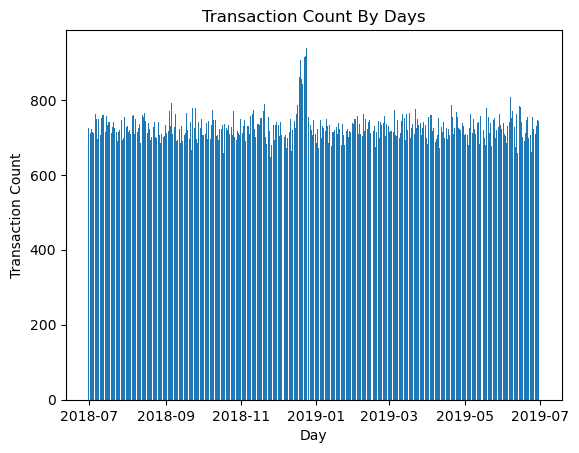

In [33]:
plt.bar(transaction_date_summary['DATE'], transaction_date_summary['TXN_COUNT'])

#plt.figure(figsize=(10, 20))

plt.xlabel('Day')
plt.ylabel('Transaction Count')
plt.title('Transaction Count By Days')

#plt.figure(figsize=(18, 50))


#plt.show()

In [34]:
transaction_date_summary.loc[transaction_date_summary['General_Date'] == ('2018-12-01')]

,DATE,TXN_COUNT,General_Date
153,2018-12-01,732.0,2018-12-01


In [35]:
transaction_date_summary.loc[transaction_date_summary['General_Date'] == ('2018-12-31')]

,DATE,TXN_COUNT,General_Date
183,2019-01-01,686.0,2018-12-31


In [36]:
start_index = 153
end_index = 182
december_transaction = transaction_date_summary.iloc[start_index:end_index + 1]
december_transaction

,DATE,TXN_COUNT,General_Date
153,2018-12-01,732.0,2018-12-01
154,2018-12-02,703.0,2018-12-02
155,2018-12-03,740.0,2018-12-03
156,2018-12-04,707.0,2018-12-04
157,2018-12-05,711.0,2018-12-05
158,2018-12-06,701.0,2018-12-06
159,2018-12-07,705.0,2018-12-07
160,2018-12-08,672.0,2018-12-08
161,2018-12-09,697.0,2018-12-09
162,2018-12-10,715.0,2018-12-10


Text(0.5, 1.0, 'Transaction Count For The Month Of December')

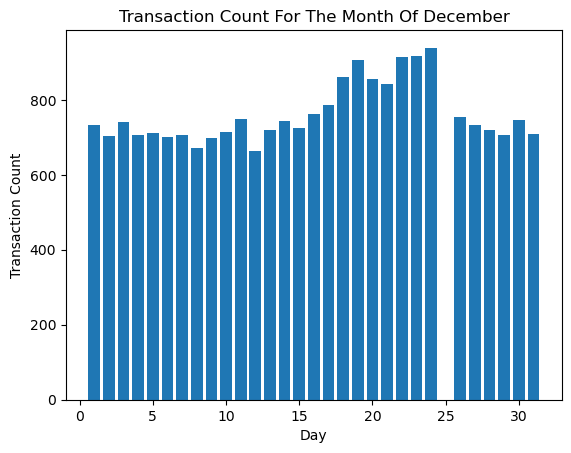

In [37]:
plt.bar(december_transaction['DATE'].dt.day, december_transaction['TXN_COUNT'])
plt.xlabel('Day')
plt.ylabel('Transaction Count')
plt.title('Transaction Count For The Month Of December')


# Creating packet size

In [38]:
outlier_removed

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [39]:
outlier_removed_nan = outlier_removed['PROD_NAME'].fillna('0')

prod_size_added = outlier_removed_nan.str.extract('(\d+)').astype(int)
prod_size_added[0].isnull().sum()

0

In [40]:
prod_size_added.dropna(subset=[0], inplace=True)
prod_size_added

,0
0,175
1,175
2,170
3,175
4,150
...,...
264831,175
264832,175
264833,170
264834,150


In [41]:

txn_qty_updated = pd.merge(outlier_removed, transaction_counts, on='DATE', how='left')
txn_qty_updated

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TXN_COUNT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,732
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,758
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,754
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,711
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,737
...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,699
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,760
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,729
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,732


In [42]:
prod_size_added = pd.concat ([txn_qty_updated, prod_size_added.reset_index(drop=True)], axis=1)
prod_size_added

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TXN_COUNT,0
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,732,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,758,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,754,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,711,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,737,150
...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,699,175
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,760,175
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,729,170
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,732,150


In [43]:
prod_size_added.columns = ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 
                           'TOT_SALES', 'TXN_COUNT',  'PACK_SIZE']

In [44]:
prod_size_added

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TXN_COUNT,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,732,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,758,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,754,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,711,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,737,150
...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,699,175
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,760,175
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,729,170
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,732,150


Text(0.5, 1.0, 'Histogram of PACK_SIZE')

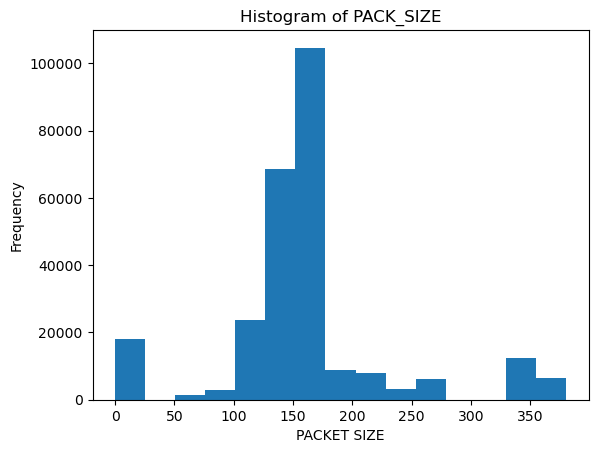

In [45]:
plt.hist(prod_size_added['PACK_SIZE'], bins=15)

plt.xlabel('PACKET SIZE')
plt.ylabel('Frequency')
plt.title('Histogram of PACK_SIZE')

# Create Brand Name

In [46]:
prod_brand = prod_size_added['PROD_NAME'].str.split().str[0]

In [47]:
prod_brand.unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', nan, 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [48]:
prod_brand_added = pd.concat ([prod_size_added, prod_brand], axis=1)
prod_brand_added.columns = ['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 
                            'TOT_SALES', 'TXN_COUNT',  'PACK_SIZE', 'BRAND_NAME']
prod_brand_added

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TXN_COUNT,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,732,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,758,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,754,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,711,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,737,150,Kettle
...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,699,175,Kettle
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,760,175,Tostitos
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,729,170,Doritos
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,732,150,Doritos


In [49]:
prod_brand_added['BRAND_NAME'].replace({
        'Red' : 'RRD',
        'Smith' : 'Smiths',
        'Dorito': 'Doritos',
        'WW': 'Woolworths',
        'Infzns': 'Infuzions',
        'Snbts':'Sunbites'
    }, inplace=True)

In [50]:
prod_brand_added['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', nan, 'Grain', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'GrnWves', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [51]:
transaction_data = prod_brand_added

In [52]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264834 non-null  datetime64[ns]
 1   STORE_NBR       264834 non-null  int64         
 2   LYLTY_CARD_NBR  264834 non-null  int64         
 3   TXN_ID          264834 non-null  int64         
 4   PROD_NBR        264834 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        264834 non-null  int64         
 7   TOT_SALES       264834 non-null  float64       
 8   TXN_COUNT       264834 non-null  int64         
 9   PACK_SIZE       264834 non-null  int32         
 10  BRAND_NAME      246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(2)
memory usage: 23.2+ MB


# Examining Customer Data

In [53]:
purchase_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [54]:
purchase_data.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [55]:
purchase_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [56]:
purchase_data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [57]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


# Merging Transaction And Customer Data  

In [58]:
data_updated = pd.merge(transaction_data, purchase_data, on='LYLTY_CARD_NBR', how='inner')

In [59]:
data_updated

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TXN_COUNT,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,732,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,758,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,761,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,699,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,754,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,699,175,Kettle,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,760,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,729,170,Doritos,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,732,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [60]:
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   TXN_COUNT         264834 non-null  int64         
 9   PACK_SIZE         264834 non-null  int32         
 10  BRAND_NAME        246740 non-null  object        
 11  LIFESTAGE         264834 non-null  object        
 12  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), objec

# DATA ANALYSIS ON CUSTOMER SEGMENT

Text(0.5, 1.0, 'Customer Count By Premium Customer Type ')

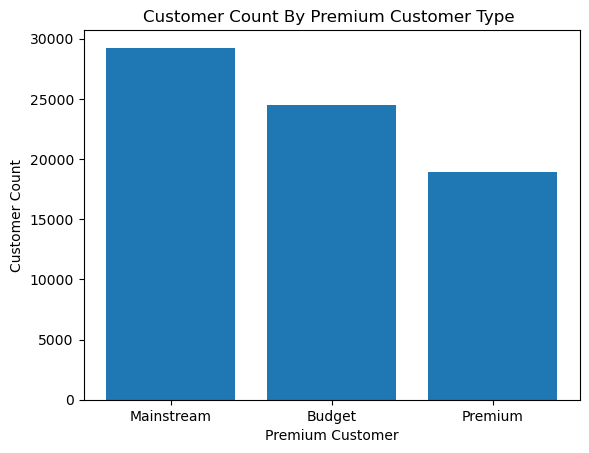

In [61]:
plt.bar(purchase_data['PREMIUM_CUSTOMER'].value_counts().index, purchase_data['PREMIUM_CUSTOMER'].value_counts().values)
plt.xlabel('Premium Customer')
plt.ylabel('Customer Count')
plt.title('Customer Count By Premium Customer Type ')

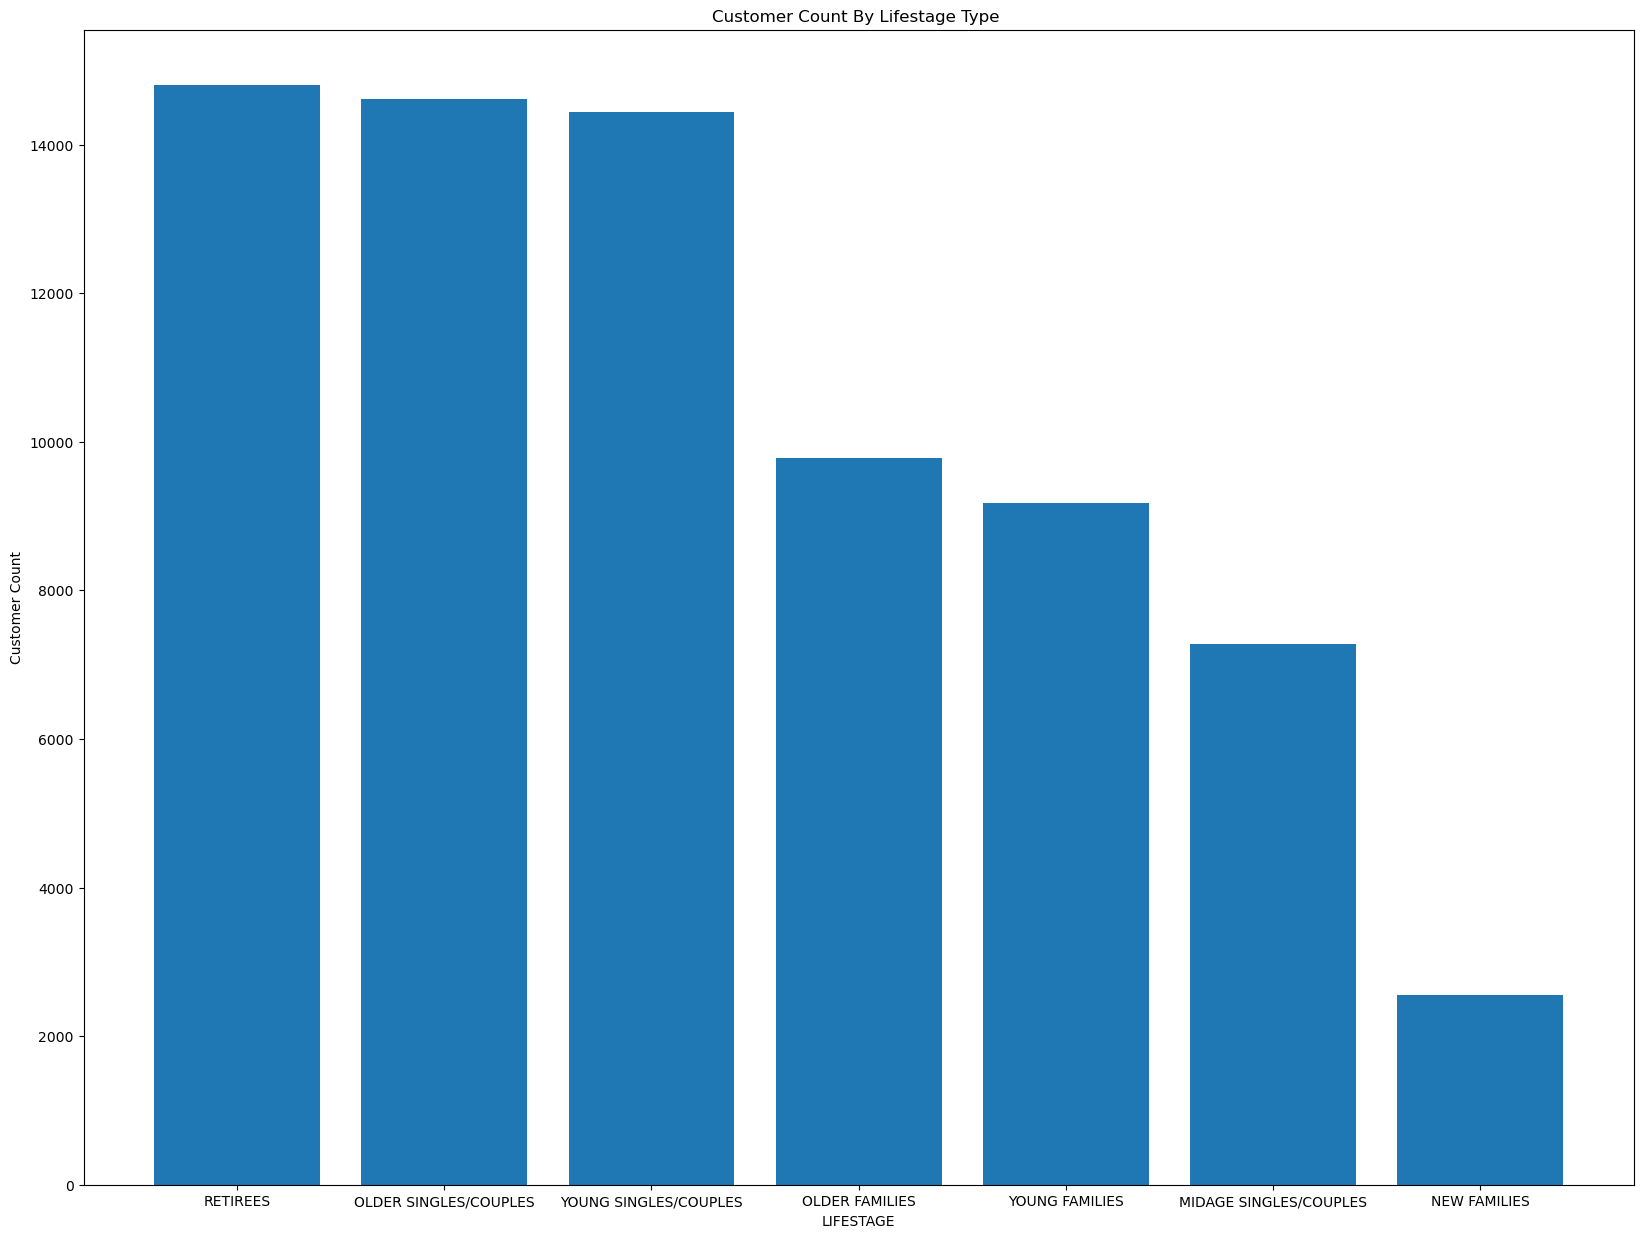

In [62]:
plt.figure(figsize=(20, 15))
plt.bar(purchase_data['LIFESTAGE'].value_counts().index, purchase_data['LIFESTAGE'].value_counts().values)
plt.xlabel('LIFESTAGE')
plt.ylabel('Customer Count')
plt.title('Customer Count By Lifestage Type ')
plt.show()

In [63]:
data_updated

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TXN_COUNT,PACK_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,732,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,758,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,761,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,699,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,754,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,699,175,Kettle,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,760,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,729,170,Doritos,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,732,150,Doritos,YOUNG SINGLES/COUPLES,Premium


### Total sales by LIFESTAGE and PREMIUM_CUSTOMER

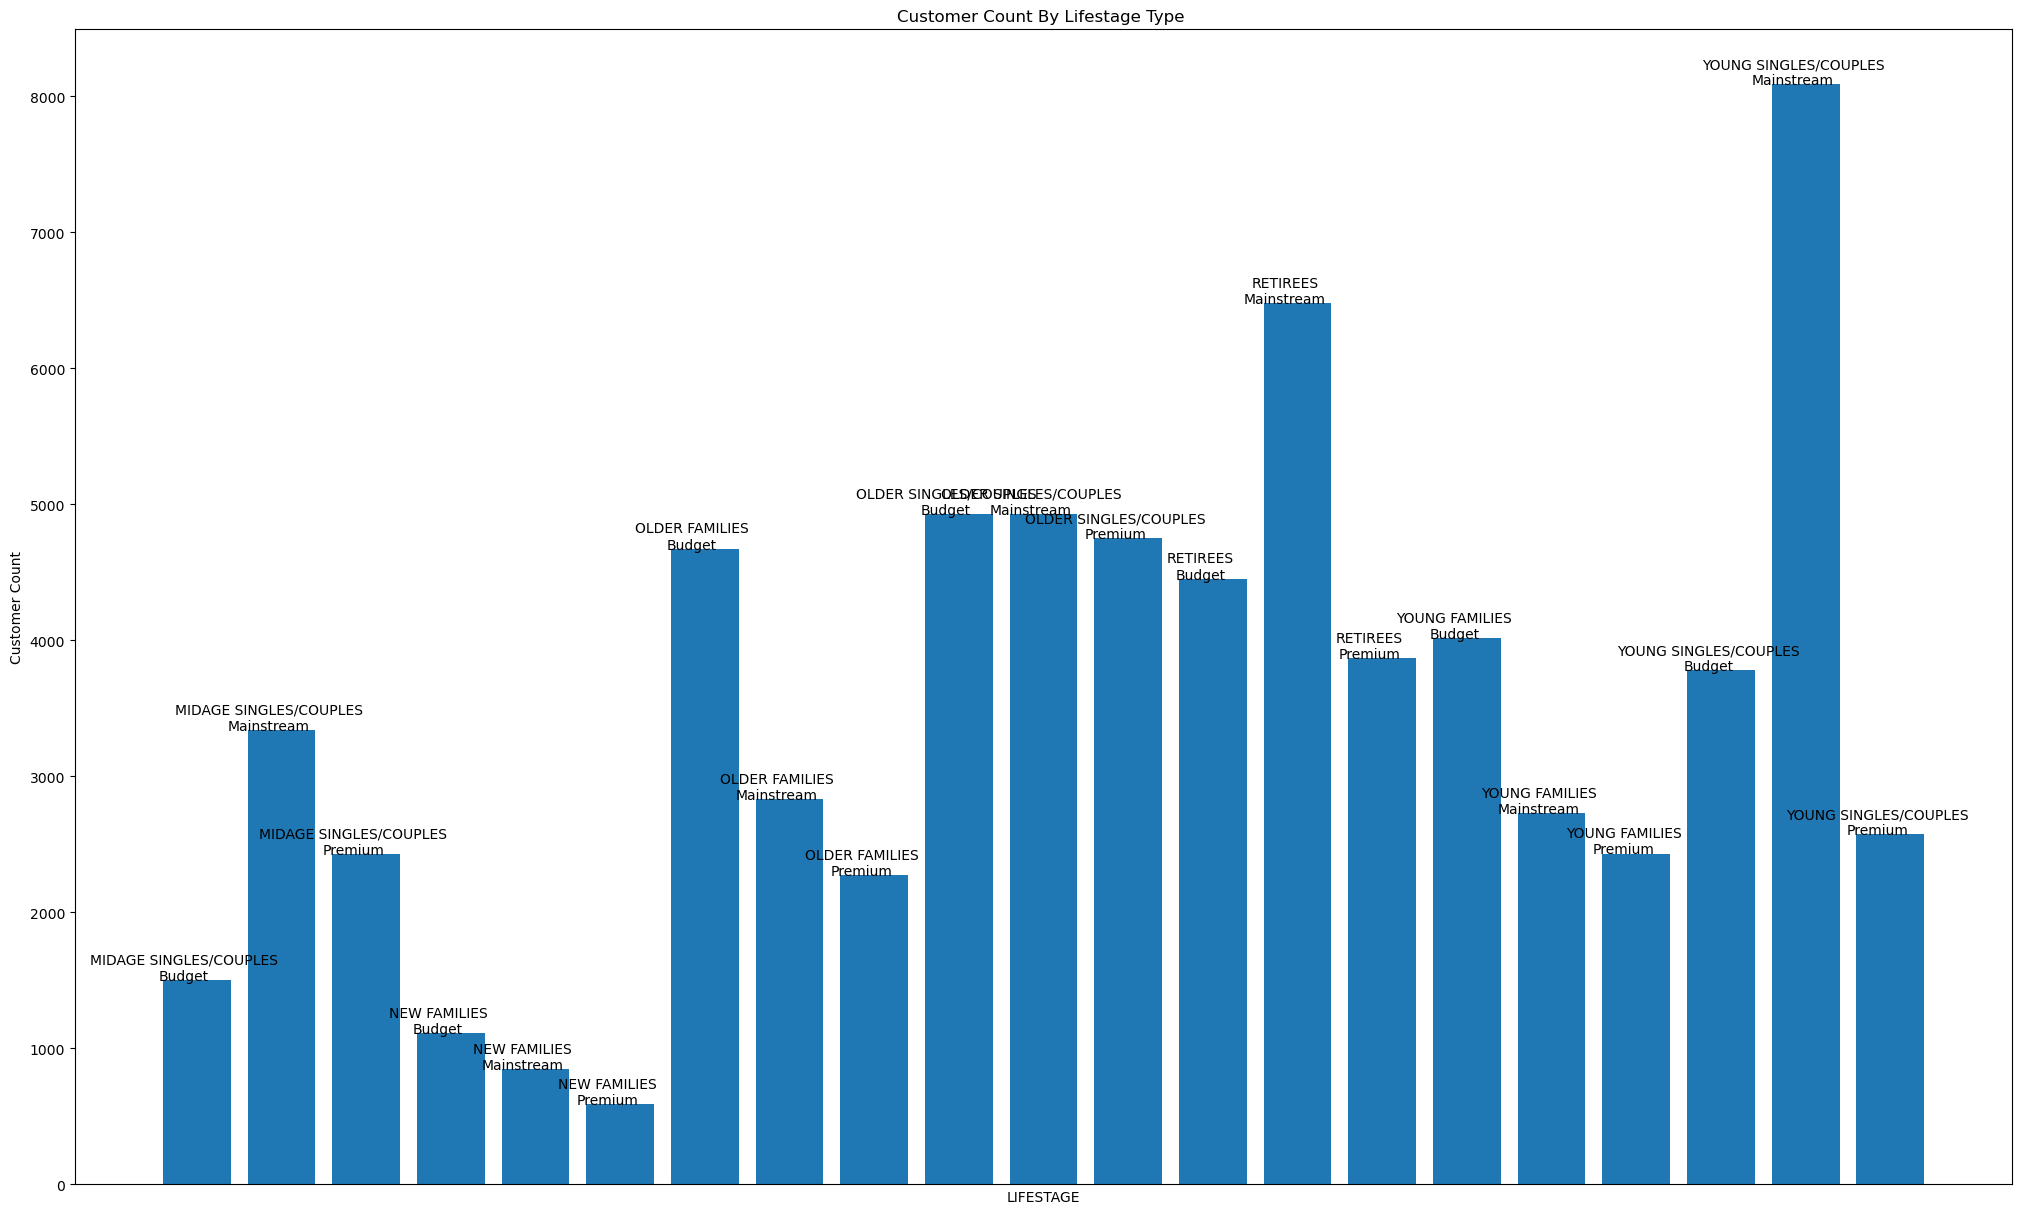

In [64]:




customer_group = purchase_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='cs_group')



plt.figure(figsize=(25, 15))
bars = plt.bar(customer_group['LIFESTAGE'] + '-' + customer_group['PREMIUM_CUSTOMER'], customer_group['cs_group'])

for bar, label1, label2 in zip(bars, customer_group['LIFESTAGE'], customer_group['PREMIUM_CUSTOMER']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1,
             f'{label1}\n{label2}', ha='center')

# Remove x-axis labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.xlabel('LIFESTAGE')
plt.ylabel('Customer Count')
plt.title('Customer Count By Lifestage Type ')
plt.show()

# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [65]:
sorted_bars = sorted(bars, key=lambda x: x.get_height(), reverse=True)
max_bar = sorted_bars[0]
second_max_bar = sorted_bars[1]

In [66]:
max_category_combination = customer_group.loc[max_bar.get_x() // 2]
max_count = max_bar.get_height()

In [67]:
max_count

8088

In [68]:
max_category_combination

LIFESTAGE           OLDER SINGLES/COUPLES
PREMIUM_CUSTOMER                   Budget
cs_group                             4929
Name: 9, dtype: object

### Average Units By Lifestage Type Per Purchase

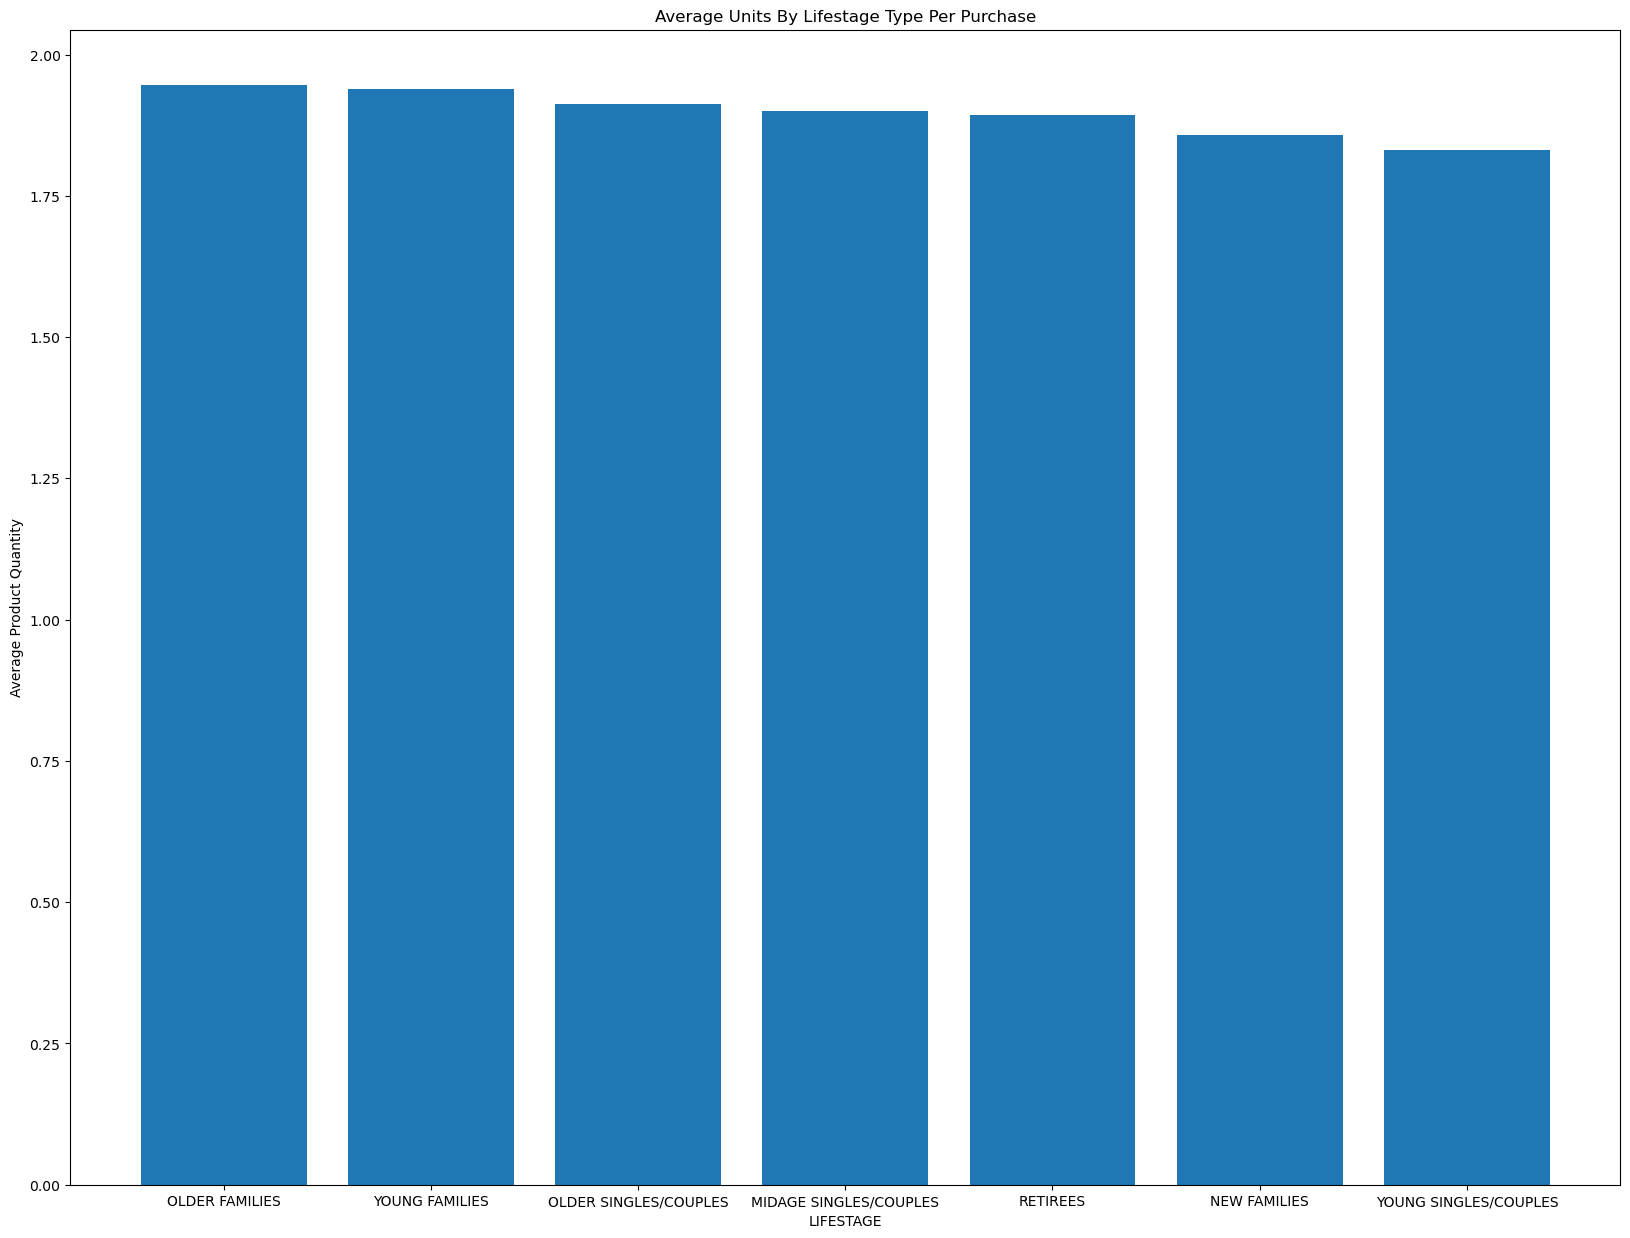

In [81]:
plt.figure(figsize=(20, 15))

grouped_data = data_updated.groupby('LIFESTAGE')['PROD_QTY'].mean().reset_index()
sorted_data = grouped_data.sort_values(by='PROD_QTY', ascending=False)

plt.bar(sorted_data['LIFESTAGE'], sorted_data['PROD_QTY'])
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Product Quantity')
plt.title('Average Units By Lifestage Type Per Purchase')
plt.show()

### Average Units per Purchase By Premium Customer group

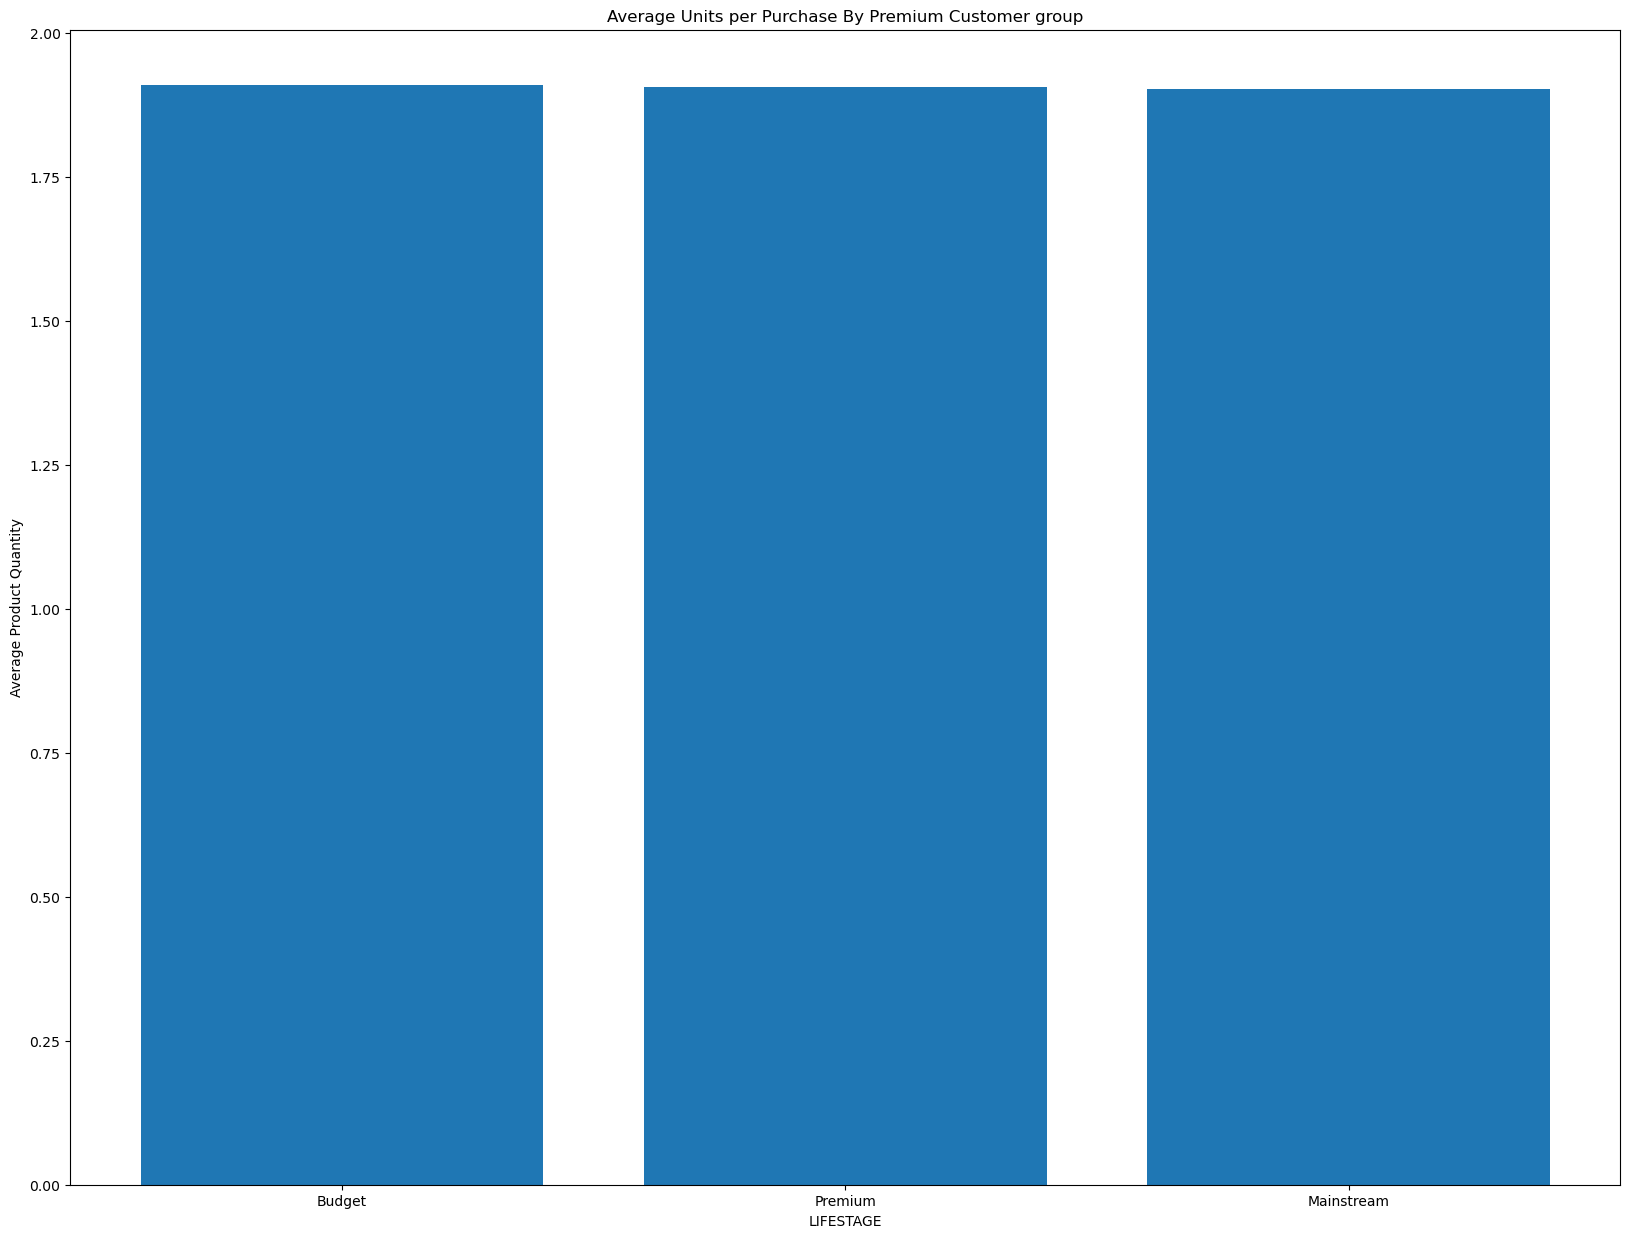

In [82]:
plt.figure(figsize=(20, 15))

grouped_data = data_updated.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].mean().reset_index()
sorted_data = grouped_data.sort_values(by='PROD_QTY', ascending=False)

plt.bar(sorted_data['PREMIUM_CUSTOMER'], sorted_data['PROD_QTY'])
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Product Quantity')
plt.title('Average Units per Purchase By Premium Customer group')
plt.show()

#  Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

### Average Price per purchase By Lifestage Type

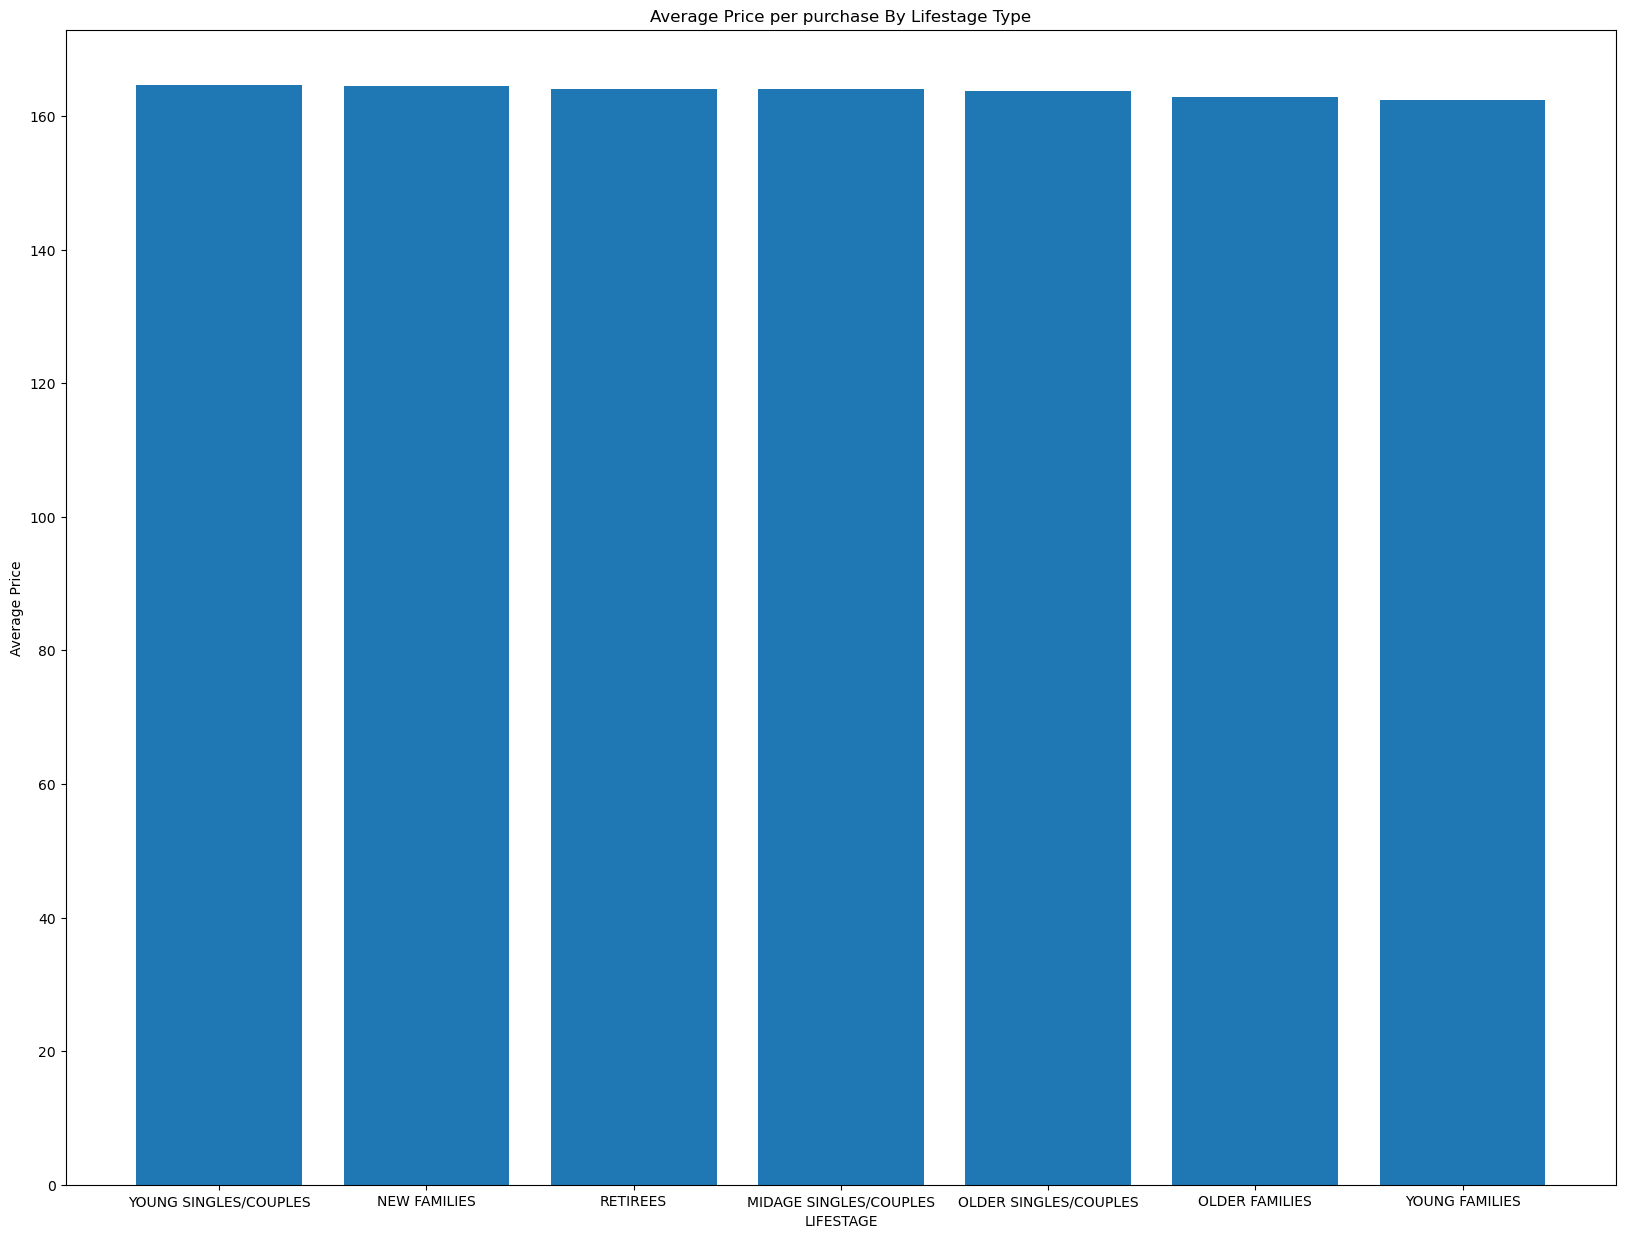

In [83]:
plt.figure(figsize=(20, 15))

grouped_data = data_updated.groupby('LIFESTAGE')['PACK_SIZE'].mean().reset_index()
sorted_data = grouped_data.sort_values(by='PACK_SIZE', ascending=False)

plt.bar(sorted_data['LIFESTAGE'], sorted_data['PACK_SIZE'])
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Price')
plt.title('Average Price per purchase By Lifestage Type')
plt.show()

### Average Price per purchase By Premium Customer group

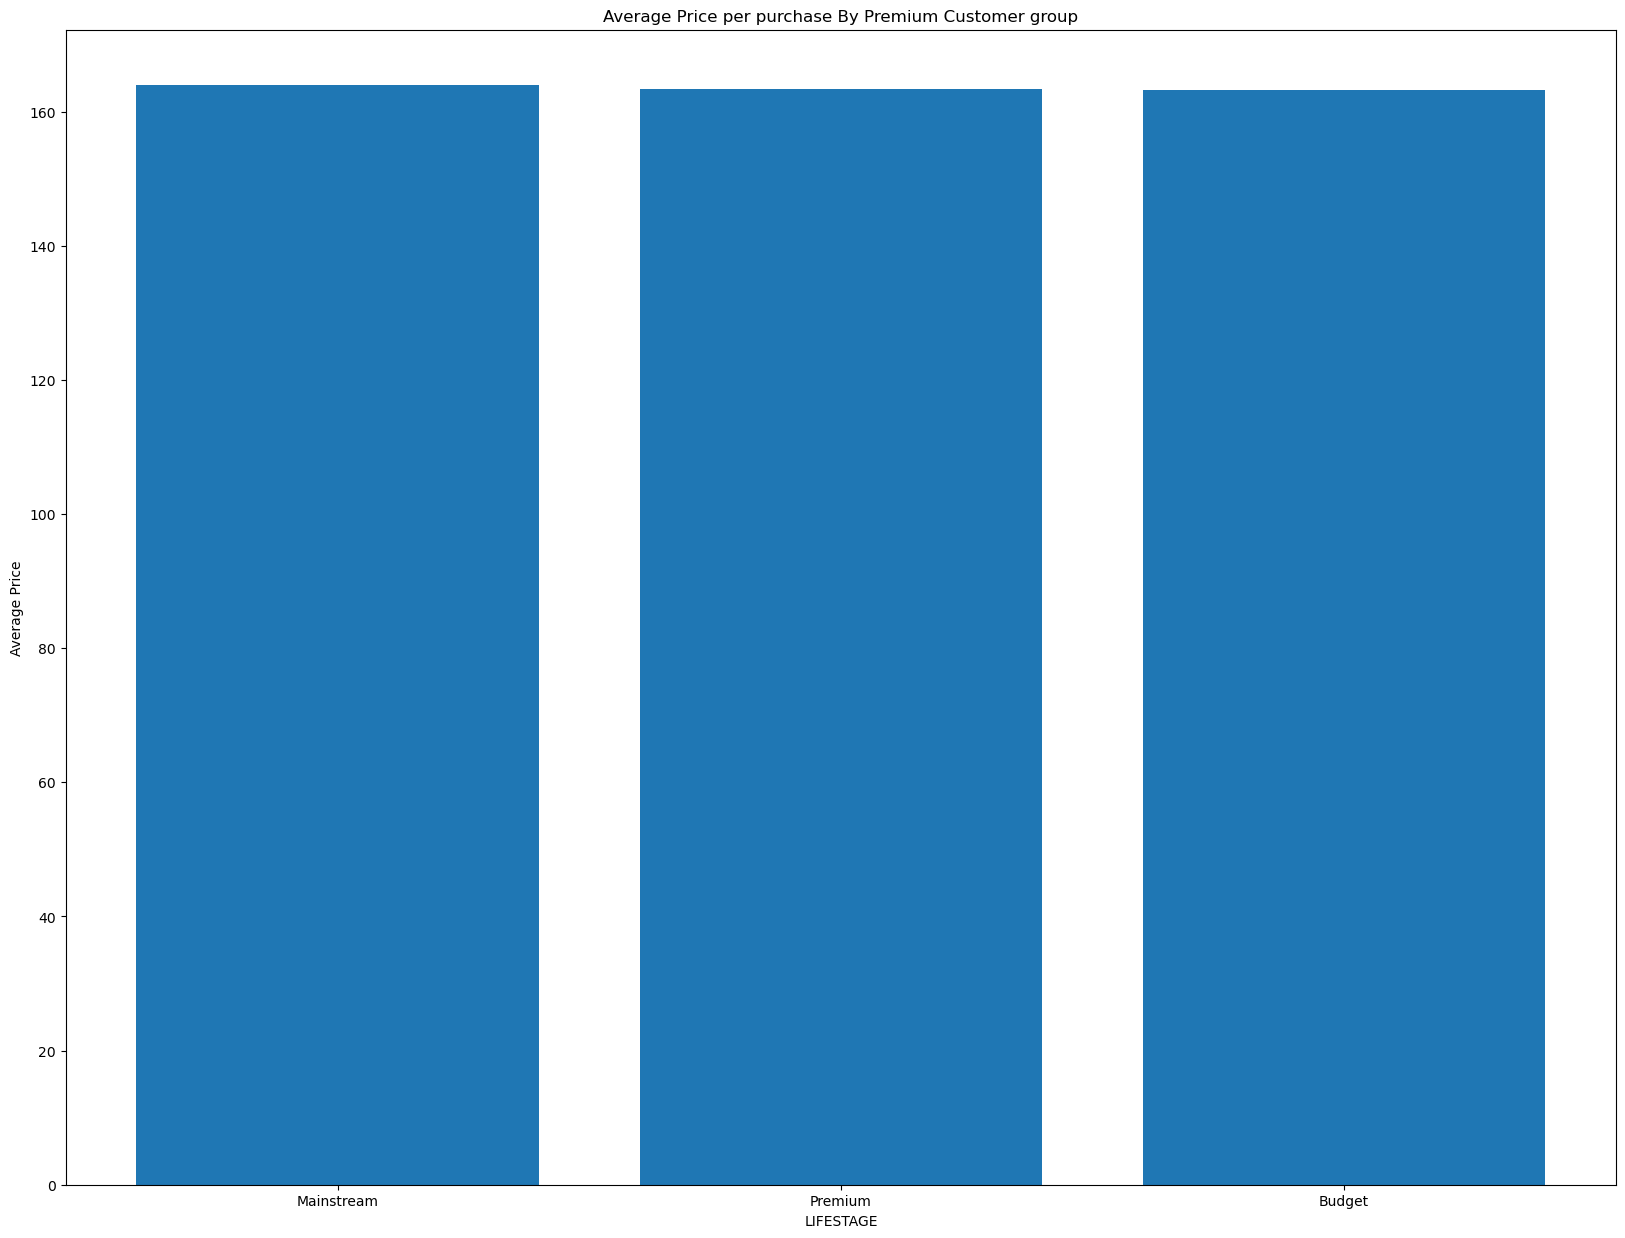

In [84]:
plt.figure(figsize=(20, 15))

grouped_data = data_updated.groupby('PREMIUM_CUSTOMER')['PACK_SIZE'].mean().reset_index()
sorted_data = grouped_data.sort_values(by='PACK_SIZE', ascending=False)

plt.bar(sorted_data['PREMIUM_CUSTOMER'], sorted_data['PACK_SIZE'])
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Price')
plt.title('Average Price per purchase By Premium Customer group')
plt.show()